
# Primordial Black Hole Evaporation -- Purely Gravitational Interacting Dark Matter.                                                                                                                        
## Authors: Andrew Cheek, Lucien Heurtier, Yuber F. Perez-Gonzalez, Jessica Turner         

## Based on: arXiv:2107.00013 (P1) and  arXiv:2107.00016 (P2), arXiv:2212.XXXXX  
## ------------------------------------------------------------------------------------------------------

### Basic notebook to show how to calculate the relic density of a dark matter particle produced only by Hawking radiation. 

In [1]:
import SolFBEqs_Mono as pbh_mono          # Code for Monochromatic
import SolFBEqs_MassDist as pbh_MD        # Code for Mass distribution only
import SolFBEqs_SpinMassDist as pbh_SMD   # Code for Mass & Spin distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Set the parameters

In [3]:
Mc   = 1e5      # Peak mass in g at formation  --> Taken here as a parameter
asc  = 0.0      # Mean initial angular momentum parameter, ast = 0. -> Schwarzschild, ast > 0. -> Kerr.
beta = 10.**-3. # Parameter describing the initial BH energy density over total energy density 
mdm  = 1.e2     # Dark Matter Mass in GeV
sDM  = 2.0      # Spin of Dark Matter

#### The class FBEqs_Sol is where the evolution is calculated 

In [4]:
# Monochromatic case

foh2_mono = pbh_mono.FBEqs_Sol(np.log10(Mc), asc, np.log10(beta), np.log10(mdm), sDM)

xm, tm, MBHm, astm, Radm, PBHm, TUnm, NDBEm, Tevm  = foh2_mono.Solt()

#### For a Mass & Spin distribution, we require additional parameters

We consider a distribution such that the BH number density is given by

$$ n_{\rm BH} = \int dM f_{\rm BH} (M). $$

We consider different types of distributions (see 1705.05567):

1. Log-normal, $$ f_{\rm BH} = \frac{n_{\rm BH}}{\sqrt{2\pi}\sigma M}\exp\left(-\frac{\log^2(M/M_c)}{2\sigma^2}\right) $$
2. Power law, $$ f_{\rm BH} \propto M^{-\alpha} $$
3. Critical collapse $$ f_{\rm BH} \propto M^{2.85} \exp(-(M/M_f)^{2.85}) $$ 
4. Metric Preheating

Usage: Distribution types
Mass:
1. typ_MD = 0 $\to$ Lognormal, requires 1 parameter, sigma
2. typ_MD = 1 $\to$ Power law, requires 2 parameters, [sigma, alpha]
3. typ_MD = 2 $\to$ Critical collapse, doesn't require any parameters
4. typ_MD = 3 $\to$ Metric preheating, doesn't require any parameters
Spin:
1. typ_SD = 0 $\to$ Gaussian, requires 1 parameter, sigma
2. typ_SD = 1 $\to$ Merger spin distribution, doesn't require any parameters

In [5]:
typ_MD  = 0   # Type of mass distribution
sig_M   = 0.5 # Width of the distribution
alpha   = 1.0 # Alpha parameter -> used for Power law scenario

if typ_MD == 1:
    pars_MD = [sig_M, alpha]
else:
    pars_MD = sig_M

typ_SD  = 0   # Type of spin distribution
sig_a   = 0.25 # Width of the spin distribution
pars_SD = sig_a

typ  = [typ_MD, typ_SD]
pars_SMD = [pars_MD, pars_SD]

In [6]:
# Solution for a Mass distribution only

foh2_MD = pbh_MD.FBEqs_Sol(np.log10(Mc), np.log10(beta), typ_MD, pars_MD, np.log10(mdm), sDM)

xMD, tMD, RadMD, PBHMD, TUnMD, NDBE_MD, Tev_MD  = foh2_MD.Solt()

Mi = 10^5.0 g, mDM = 10^2.0 GeV
Distribution type = Log-Normal, pars = 0.5 

Solving mass evolution given a particle physics model...
Time is 2.8295702934265137 s

Computing BH lifetimes and interpolating...
Time is 2.340684413909912 s

Integrating and interpolating terms dependent on the mass distribution...


100%|█████████████████████████████████████████████████████████████| 175/175 [00:42<00:00,  4.09it/s]


Time is 42.77445888519287 s

Solving the Friedmann-Boltzmann equations...
Time is 0.22664189338684082 s



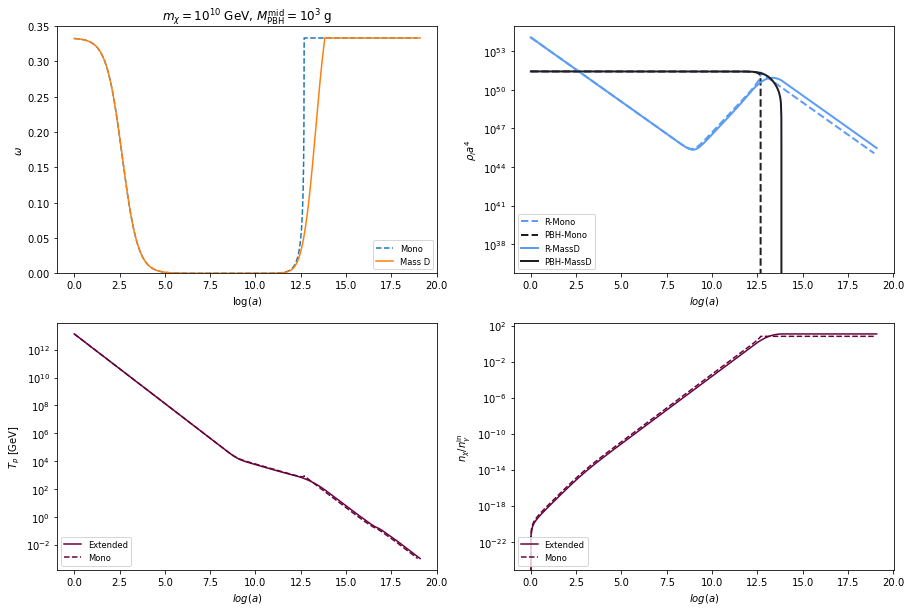

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15.,10.))


wm   = -1. + (1/3.)*(3*10**(-3*xm)*PBHm + 4*10**(-4*xm)*Radm)/(10**(-3*xm)*PBHm + 10**(-4*xm)*Radm) # Monochromatic
wMD  = -1. + (1/3.)*(3*10**(-3*xMD)*PBHMD + 4*10**(-4*xMD)*RadMD)/(10**(-3*xMD)*PBHMD + 10**(-4*xMD)*RadMD) # Mass distribution

ax[0,0].plot(xm, wm, ls='--', label='Mono')
ax[0,0].plot(xMD, wMD, label='Mass D')
ax[0,0].set_ylim(0., 0.35)
ax[0,0].set_title(r"$m_\chi=10^{10}$ GeV, $M_{\rm PBH}^{\rm mid}=10^3$ g")
ax[0,0].set_xlabel(r"$\log(a)$")
ax[0,0].set_ylabel(r"$\omega$")
ax[0,0].legend(loc="lower right", fontsize = "small")

ax[0,1].plot(xm, 10**-xm*Radm, label='R-Mono', lw = 2, ls='--', color = '#5D9CF3')
ax[0,1].plot(xm, PBHm, label='PBH-Mono', lw = 2, color = '#1e1f26', ls='--')
ax[0,1].plot(xMD, 10**-xMD*RadMD, label='R-MassD', lw = 2, color = '#5D9CF3')
ax[0,1].plot(xMD, PBHMD, label='PBH-MassD', lw = 2, color = '#1e1f26')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel(r"$log(a)$")
ax[0,1].set_ylabel(r"$\rho_{i} a^4$")
ax[0,1].legend(loc="lower left", fontsize = "small")

ax[1,0].plot(xMD, TUnMD, label=r"Extended", color = '#66023C')
ax[1,0].plot(xm, TUnm, label=r"Mono", color = '#66023C', linestyle='--')
ax[1,0].set_ylabel(r"$T_{p}$ [GeV]")
ax[1,0].set_xlabel(r"$log(a)$")
ax[1,0].set_yscale('log')
ax[1,0].legend(loc="lower left", fontsize = "small")

ax[1,1].plot(xMD, NDBE_MD, label=r"Extended", color = '#66023C')
ax[1,1].plot(xm, NDBEm, label=r"Mono", color = '#66023C', linestyle='--')
ax[1,1].set_ylabel(r"$n_\chi/n_\gamma^{\rm in}$")
ax[1,1].set_xlabel(r"$log(a)$")
ax[1,1].set_yscale('log')
ax[1,1].legend(loc="lower left", fontsize = "small")

plt.show()

In [8]:
# Solution for a Mass & Spin distribution

foh2_SMD = pbh_SMD.FBEqs_Sol(np.log10(Mc), asc, np.log10(beta), typ, pars_SMD, np.log10(mdm), sDM)

xSMD, tSMD, RadSMD, PBHSMD, TUnSMD, NDBE_SMD  = foh2_SMD.Solt()

Mi = 10^5.0 g, a*i = 0.0, mDM = 10^2.0 GeV, sDM = 2.0
Mass Distribution type = Log-Normal, pars = 0.5
Spin Distribution type = Gaussian, pars = 0.25

Solving mass evolution given a particle physics model...
Time is 3.62233829498291 s

Finding the BH lifetimes for a fixed mass and varying the a*...
Time is 2.3373706340789795 s

Integrating and interpolating terms dependent on the mass & spin distribution...


100%|█████████████████████████████████████████████████████████████| 250/250 [05:22<00:00,  1.29s/it]


Time is 322.4985737800598 s

Solving the Friedmann-Boltzmann equations...
Time is 0.5438199043273926 s



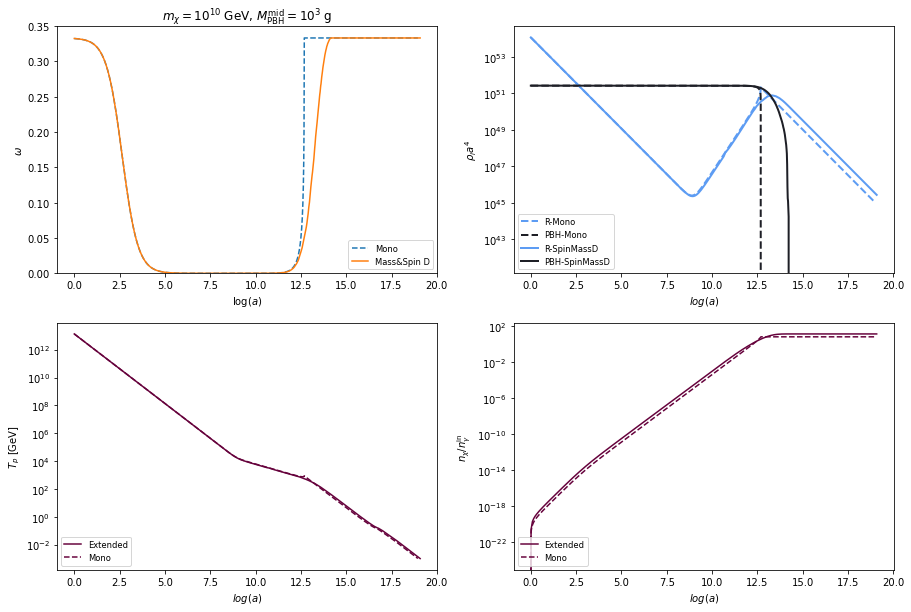

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15.,10.))


wm   = -1. + (1/3.)*(3*10**(-3*xm)*PBHm + 4*10**(-4*xm)*Radm)/(10**(-3*xm)*PBHm + 10**(-4*xm)*Radm) # Monochromatic
wSMD  = -1. + (1/3.)*(3*10**(-3*xSMD)*PBHSMD + 4*10**(-4*xSMD)*RadSMD)/(10**(-3*xSMD)*PBHSMD + 10**(-4*xSMD)*RadSMD) # Mass distribution

ax[0,0].plot(xm, wm, ls='--', label='Mono')
ax[0,0].plot(xSMD, wSMD, label='Mass&Spin D')
ax[0,0].set_ylim(0., 0.35)
ax[0,0].set_title(r"$m_\chi=10^{10}$ GeV, $M_{\rm PBH}^{\rm mid}=10^3$ g")
ax[0,0].set_xlabel(r"$\log(a)$")
ax[0,0].set_ylabel(r"$\omega$")
ax[0,0].legend(loc="lower right", fontsize = "small")

ax[0,1].plot(xm, 10**-xm*Radm, label='R-Mono', lw = 2, ls='--', color = '#5D9CF3')
ax[0,1].plot(xm, PBHm, label='PBH-Mono', lw = 2, color = '#1e1f26', ls='--')
ax[0,1].plot(xSMD, 10**-xSMD*RadSMD, label='R-SpinMassD', lw = 2, color = '#5D9CF3')
ax[0,1].plot(xSMD, PBHSMD, label='PBH-SpinMassD', lw = 2, color = '#1e1f26')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel(r"$log(a)$")
ax[0,1].set_ylabel(r"$\rho_{i} a^4$")
ax[0,1].legend(loc="lower left", fontsize = "small")

ax[1,0].plot(xSMD, TUnSMD, label=r"Extended", color = '#66023C')
ax[1,0].plot(xm, TUnm, label=r"Mono", color = '#66023C', linestyle='--')
ax[1,0].set_ylabel(r"$T_{p}$ [GeV]")
ax[1,0].set_xlabel(r"$log(a)$")
ax[1,0].set_yscale('log')
ax[1,0].legend(loc="lower left", fontsize = "small")

ax[1,1].plot(xSMD, NDBE_SMD, label=r"Extended", color = '#66023C')
ax[1,1].plot(xm, NDBEm, label=r"Mono", color = '#66023C', linestyle='--')
ax[1,1].set_ylabel(r"$n_\chi/n_\gamma^{\rm in}$")
ax[1,1].set_xlabel(r"$log(a)$")
ax[1,1].set_yscale('log')
ax[1,1].legend(loc="lower left", fontsize = "small")

plt.show()

## $\Omega h^2$ is computed directly in the function Omega_h2

In [10]:
from IPython.utils import io

In [11]:
with io.capture_output() as captured:
    Oh2_m  = foh2_mono.Omega_h2()
    Oh2_MD = foh2_MD.Omega_h2()
    Oh2_SMD = foh2_SMD.Omega_h2()

print("Omega h^2_mono = "+"{0}".format(Oh2_m)+" Omega h^2|_MD =  {0}, Omega h^2|_SMD = {1}".format(Oh2_MD, Oh2_SMD))

Omega h^2_mono = 32.32452407728812 Omega h^2|_MD =  24.235779641156682, Omega h^2|_SMD = 29.630319720209307
